In [2]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

### Train data

In [3]:
train = pd.read_csv('../ml-data/cyberattack_detection/3_selected_features/A1_train_data_TV.csv', sep=',')

In [4]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(train.values)

KMeans(n_clusters=3, random_state=0)

In [6]:
predict = kmeans.predict(train)

In [9]:
train['cluster'] = predict
train['cluster'].value_counts()

In [11]:
cluster2 = train.loc[train['cluster'] == 2]

In [12]:
cluster2.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,cluster
42330,296.487717,-0.959005,-0.909124,-138.118560,-0.821304,-0.027890,0.027867,-0.574712,27.706370,0.003724,2
77793,164.045040,2.622254,0.100128,-77.892472,-0.645430,0.005163,0.002575,-0.255301,10.929448,-0.002101,2
348964,444.411187,-4.954078,0.187397,-204.775201,-1.643990,-0.074939,0.009878,-0.967865,45.153573,0.012412,2
524311,255.555510,-0.874872,-1.038245,-126.570828,-0.738355,-0.017026,-0.032184,0.326587,-8.097330,-0.012487,2
614948,289.234453,0.087604,-1.163188,-133.685342,-0.720499,-0.019426,0.049156,-0.773710,35.312897,0.006376,2


In [15]:
cluster0_sample = train.loc[train['cluster'] == 0].sample(frac =.01)
cluster1_sample = train.loc[train['cluster'] == 1].sample(frac =.01)

In [16]:
sample = pd.concat([cluster2,cluster1_sample,cluster0_sample])
sample['cluster'].value_counts()

0    132258
1      6560
2       163
Name: cluster, dtype: int64

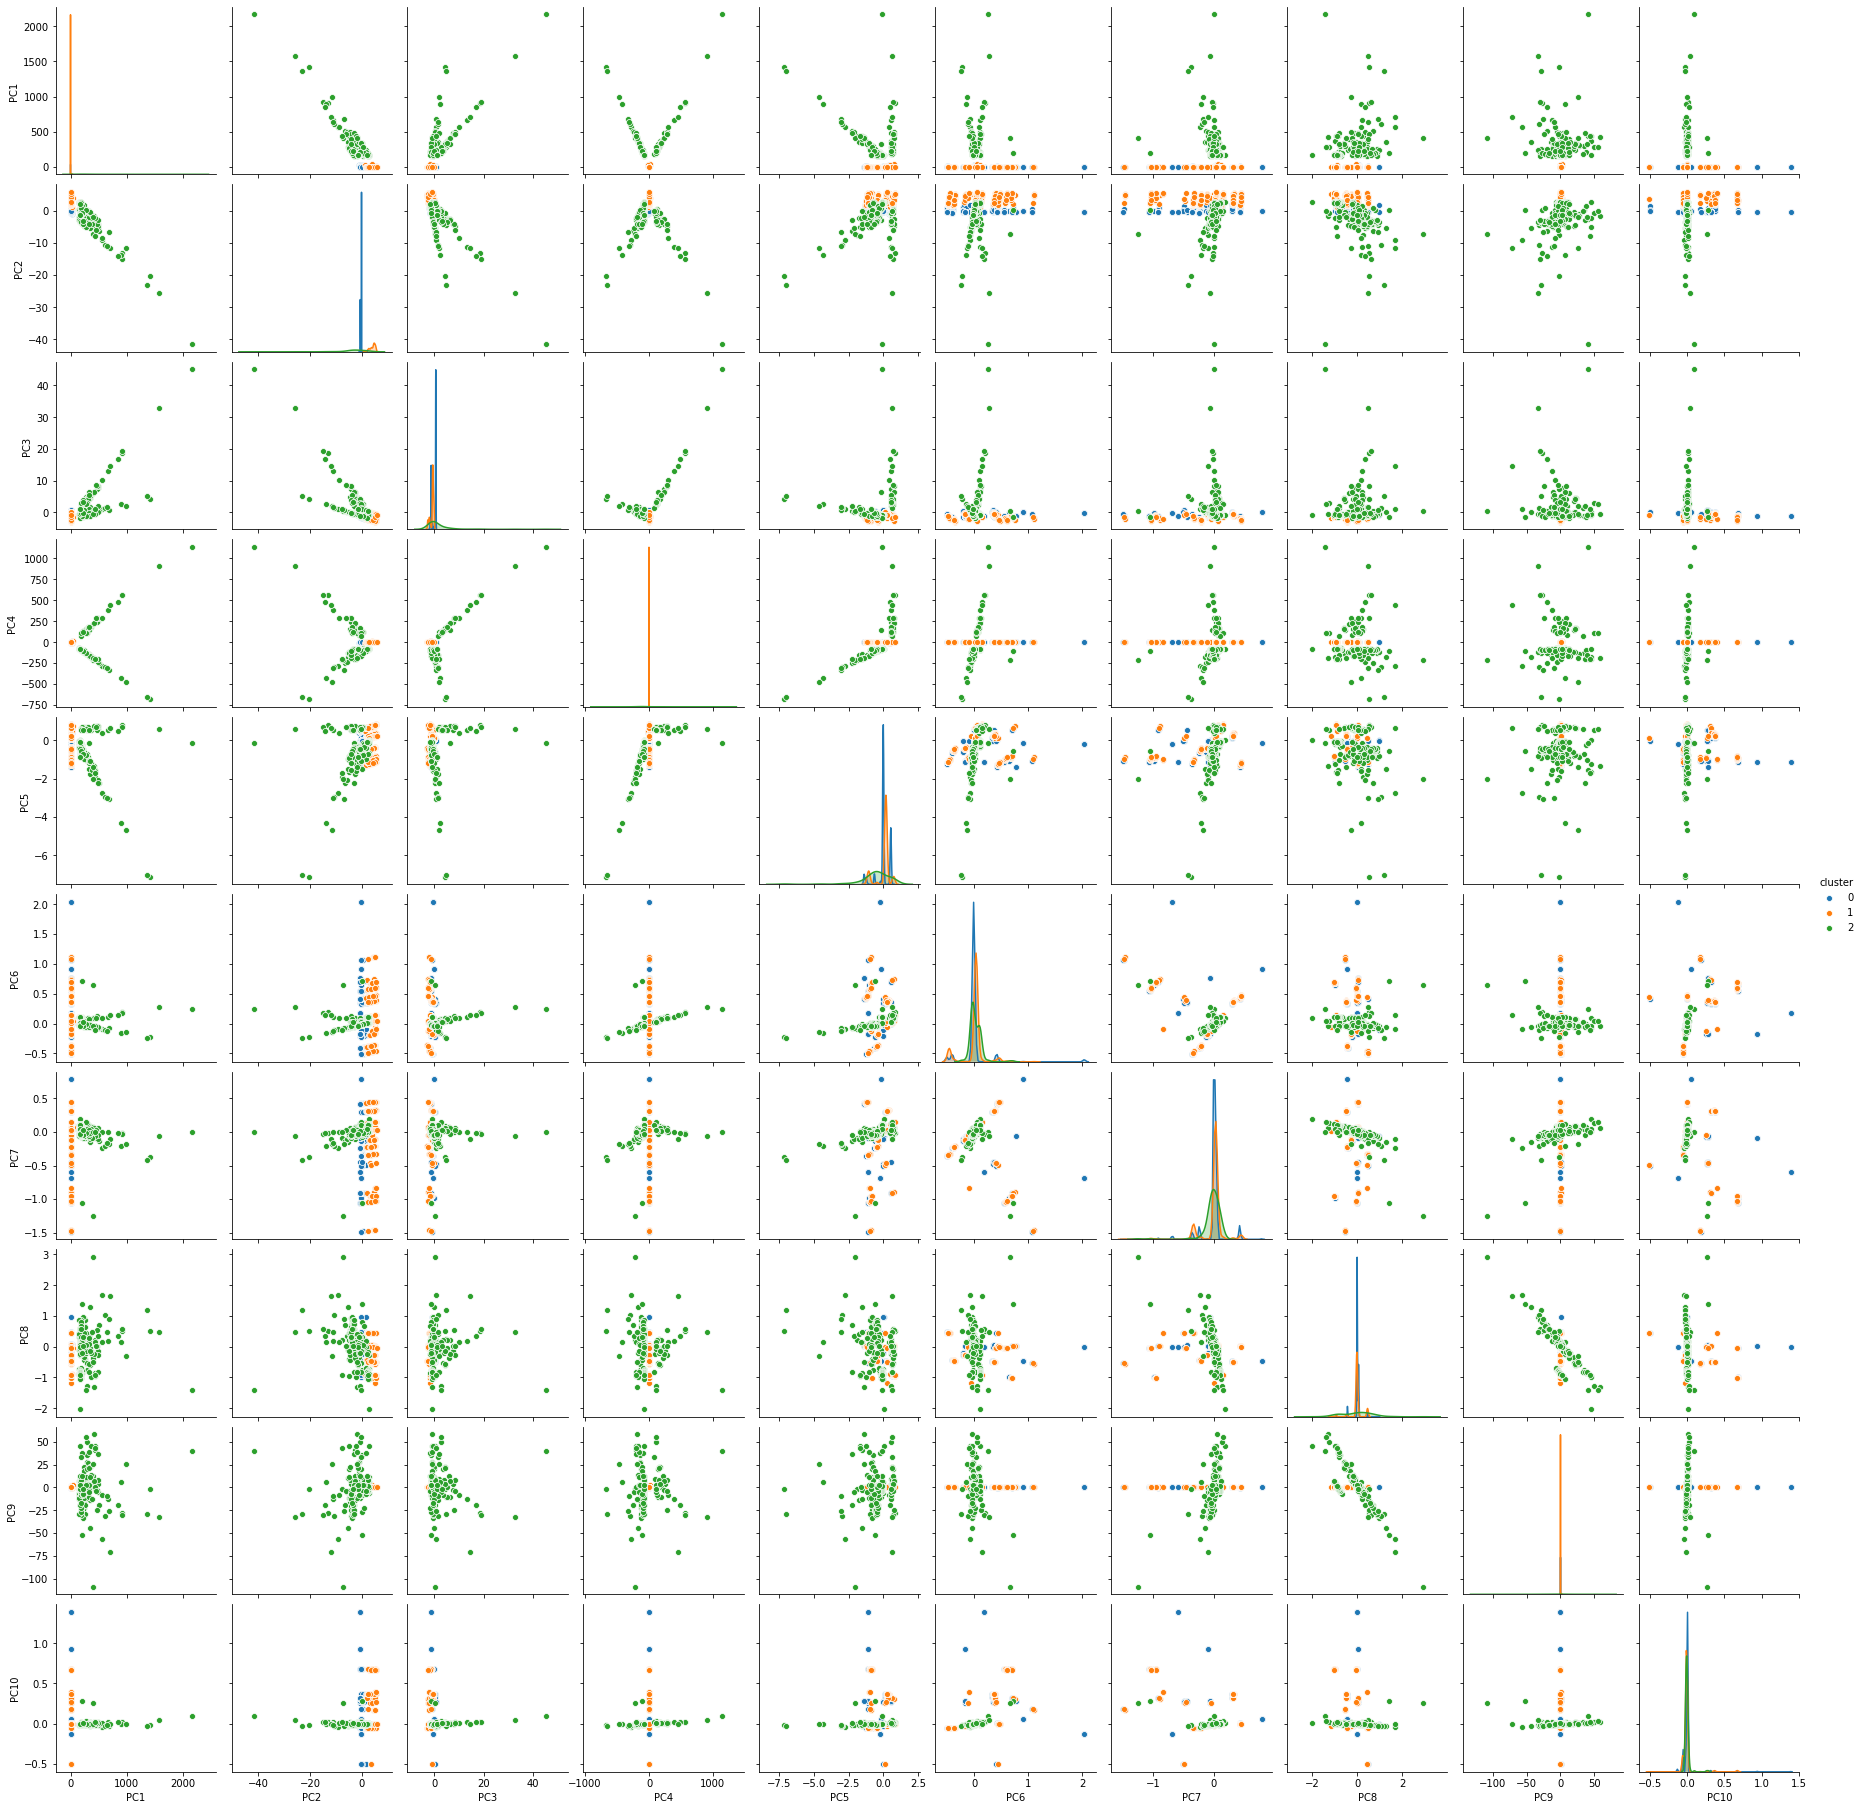

In [17]:
sns.pairplot(sample, hue = 'cluster')

In [18]:
cluster2.to_csv('predictions/A1_train_Kmean_PCA.csv', sep=',')

In [24]:
original_train = pd.read_csv('../ml-data/cyberattack_detection/1_raw_data/A2_1/training_data', sep=','
                       ,names=['Timestamp','Duration','Protocol','SrcIPAddress','SrcPort','Direction',
                               'DestIPAddress','DestPort','State','SrcTypeService','DestTypeService',
                               'TotalPackets','TotalBytes','SourceBytes'])

train_anomalies = original_train[original_train.index.isin(cluster2.index)]

In [25]:
train_anomalies.head()

,Timestamp,Duration,Protocol,SrcIPAddress,SrcPort,Direction,DestIPAddress,DestPort,State,SrcTypeService,DestTypeService,TotalPackets,TotalBytes,SourceBytes
42330,2012/12/01 13:19:23.079263,2913.796423,tcp,131.179.92.105,42508,->,234.223.87.6,80,FSPA_FSPA,0.0,0.0,957569,812709490,24672269
77793,2012/12/01 13:27:40.701357,3487.617736,udp,144.105.93.187,35155,<->,154.127.109.154,64131,CON,0.0,0.0,519406,463226951,11645336
348964,2012/12/01 14:05:52.634943,1934.330010,tcp,169.105.93.27,36891,->,204.40.157.103,25443,FSRPA_FSPA,0.0,0.0,1442700,1205710921,40246207
524311,2012/12/01 14:42:22.980022,2572.039060,tcp,175.158.88.184,1627,->,191.173.200.176,80,SRPA_FSPA,0.0,0.0,746503,795738712,11591580
614948,2012/12/01 15:03:57.667980,3493.885969,tcp,131.179.92.105,47454,->,234.223.87.6,80,FSPA_FSPA,0.0,0.0,955604,769291578,25232415


In [34]:
train_anomalies.to_csv('predictions/A1_train_Kmean_PCA_anomalies.csv', sep=',')

### Test data

In [6]:
test = pd.read_csv('../ml-data/cyberattack_detection/3_selected_features/A1_test_data_TV.csv', sep=',')

In [7]:
test_predict = kmeans.predict(test)

In [8]:
test['cluster'] = test_predict
test['cluster'].value_counts()

0    1048135
1       5705
2          5
Name: cluster, dtype: int64

/usr/local/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to c

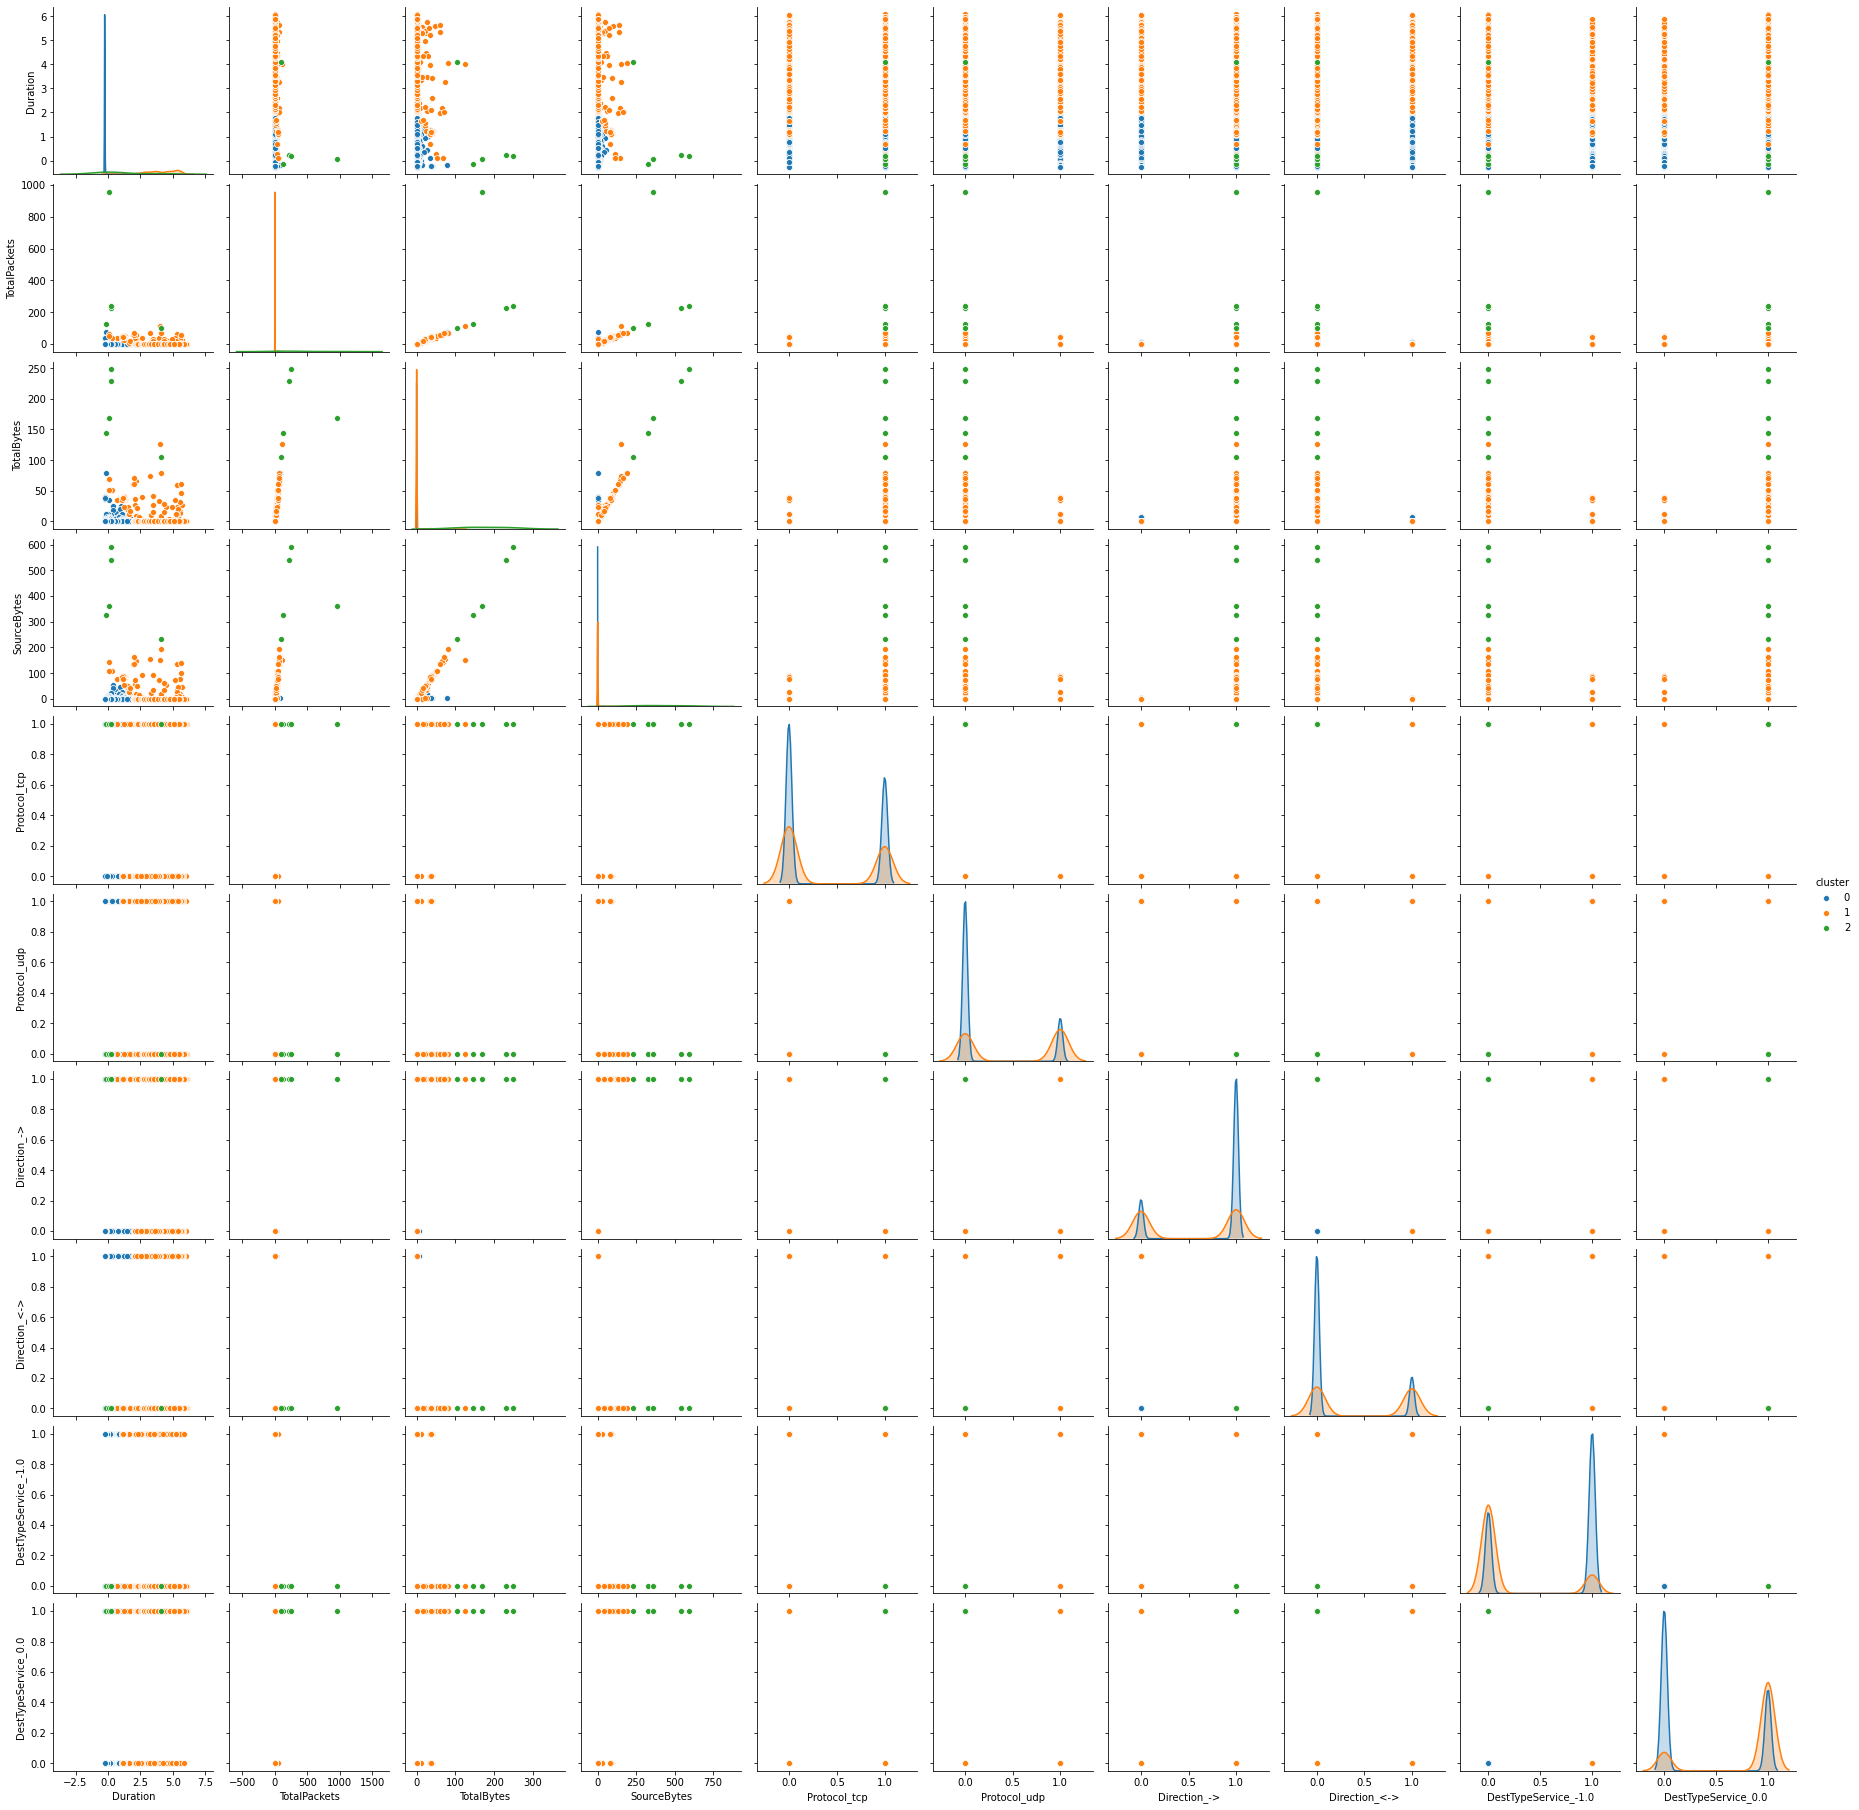

In [9]:
sns.pairplot(test, hue = 'cluster')

In [10]:
cluster2_test = test.loc[test['cluster'] == 2]

In [11]:
cluster2_test.head(10)

,Duration,TotalPackets,TotalBytes,SourceBytes,Protocol_tcp,Protocol_udp,Direction_->,Direction_<->,DestTypeService_-1.0,DestTypeService_0.0,cluster
418315,0.218906,224.070736,229.480602,538.766574,1.0,0.0,1.0,0.0,0.0,1.0,2
419585,-0.158217,124.979659,144.029333,326.557249,1.0,0.0,1.0,0.0,0.0,1.0,2
585475,0.068398,956.592427,168.370280,362.258336,1.0,0.0,1.0,0.0,0.0,1.0,2
585542,0.209969,240.316218,248.251928,591.861159,1.0,0.0,1.0,0.0,0.0,1.0,2
794643,4.085146,101.019359,104.762454,231.494617,1.0,0.0,1.0,0.0,0.0,1.0,2


In [12]:
cluster2_test.to_csv('predictions/A1_test_Kmean_TV.csv', sep=',')

In [13]:
original_test = pd.read_csv('../ml-data/cyberattack_detection/1_raw_data/A2_1/test_data', sep=','
                       ,names=['Timestamp','Duration','Protocol','SrcIPAddress','SrcPort','Direction',
                               'DestIPAddress','DestPort','State','SrcTypeService','DestTypeService',
                               'TotalPackets','TotalBytes','SourceBytes'])

test_anomalies = original_test[original_test.index.isin(cluster2_test.index)]

/usr/local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (4,7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [14]:
test_anomalies.head(10)

,Timestamp,Duration,Protocol,SrcIPAddress,SrcPort,Direction,DestIPAddress,DestPort,State,SrcTypeService,DestTypeService,TotalPackets,TotalBytes,SourceBytes
418315,2012/12/05 01:01:34.411287,290.254589,tcp,224.134.91.164,37310,->,154.195.93.62,45846,FSPA_FSPA,0.0,0.0,862161,873611545,894860724
419585,2012/12/05 01:34:01.255451,56.155544,tcp,224.134.91.164,45532,->,220.50.118.9,21006,SPA_FSRPA,0.0,0.0,480905,548319086,542395810
585475,2012/12/06 01:46:13.253117,196.826747,tcp,224.134.91.164,38956,->,167.44.122.77,11671,FSPA_FSPA,0.0,0.0,3680561,640979224,601692829
585542,2012/12/06 01:49:49.051082,284.706998,tcp,224.134.91.164,55201,->,176.221.130.153,2727,FSPA_FSPA,0.0,0.0,924666,945069474,983047134
794643,2012/12/08 00:43:05.397400,2690.217859,tcp,224.134.91.164,34001,->,181.198.18.6,29744,FSPA_FSPA,0.0,0.0,388717,398839508,384503396


In [15]:
test_anomalies.to_csv('predictions/A1_test_Kmean_TV_anomalies.csv', sep=',')